In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 数据可视化

In [16]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [17]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


创建两个分数的散点图，并使用颜色编码来可视化，如果样本是正的（被接纳）或负的（未被接纳）。

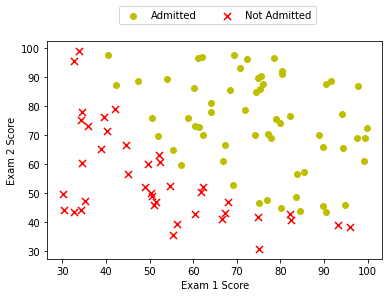

In [18]:
positive = data[data.admitted.isin(['1'])]  # 1
negetive = data[data.admitted.isin(['0'])]  # 0

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(positive['exam1'], positive['exam2'], c='y', label='Admitted')
ax.scatter(negetive['exam1'], negetive['exam2'], s=50, c='r', marker='x', label='Not Admitted')
# 设置图例显示在图的上方
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12),ncol=3)
# 设置横纵坐标名
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()


# Sigmoid function
首先来回顾下 logistic回归的假设函数：\\[{{h}_{\theta }}\left( x \right)={g({\theta}^T X)}=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
其中的 g代表一个常用的logistic function为S形函数（Sigmoid function）：
$$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(- z))


做一个快速的检查，来确保它可以工作。

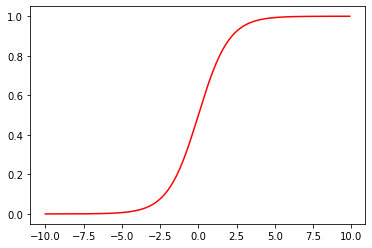

In [20]:
x1 = np.arange(-10, 10, 0.1)
plt.plot(x1, sigmoid(x1), c='r')
plt.show()

# Cost function
逻辑回归的代价函数如下:

In [21]:
def cost(theta, X, y):
    first = (-y) * np.log(sigmoid(X @ theta))
    second = (1 - y)*np.log(1 - sigmoid(X @ theta))
    return np.mean(first - second)


# 获取训练集数据

In [22]:
# add a ones column - this makes the matrix multiplication work out easier
if 'Ones' not in data.columns:
    data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
X = data.iloc[:, :-1].values  # Convert the frame to its Numpy-array representation.
y = data.iloc[:, -1].values # Return is NOT a Numpy-matrix, rather, a Numpy-array.

theta = np.zeros(X.shape[1])


检查矩阵的维度，确保一切良好。

In [23]:
X.shape, theta.shape, y.shape
# ((100, 3), (3,), (100,))

((100, 3), (3,), (100,))

In [24]:
cost(theta, X, y)
# 0.6931471805599453

0.6931471805599453

# gradient descent(梯度下降)
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [25]:
def gradient(theta, X, y):
    return (X.T @ (sigmoid(X @ theta) - y))/len(X)  
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)


In [26]:
gradient(theta, X, y)
# array([ -0.1, -12.00921659, -11.26284221])

array([ -0.1       , -12.00921659, -11.26284221])

# Learning θ parameters
注:实际上没有在这个函数中执行梯度下降，仅仅是在计算梯度。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情。

这里我们使用的是高级优化算法，运行速度通常远远超过梯度下降。方便快捷。
只需传入cost函数，已经所求的变量theta，和梯度。cost函数定义变量时变量tehta要放在第一个，若cost函数只返回cost，则设置fprime=gradient。

In [27]:
import scipy.optimize as opt


这里使用fimin_tnc或者minimize方法来拟合，minimize中method可以选择不同的算法来计算，其中包括TNC

In [28]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

# (array([-25.16131867,   0.20623159,   0.20147149]), 36, 0)

(array([-25.16131853,   0.20623159,   0.20147149]), 36, 0)

下面是第二种方法，结果是一样的

In [29]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='TNC', jac=gradient)
res
# help(opt.minimize) 
# res.x  # final_theta

     fun: 0.203497701589475
     jac: array([9.14875519e-09, 9.99037356e-08, 4.79345707e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131853,   0.20623159,   0.20147149])

In [30]:
cost(result[0], X, y)

0.203497701589475

# 验证逻辑回归
学习好了参数θ后，用这个模型预测某个学生是否能被录取。

接下来，需要编写一个函数，用所学的参数theta来为数据集X输出预测。然后就可以使用这个函数来给分类器的训练精度打分。

逻辑回归模型的假设函数：$$ {{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$
当$h_{\theta}(x)$ 大于等于0.5时，预测 y=1;当$h_{\theta}(x)$ 小于0.5时，预测 y=0 。


In [31]:
def predict(theta, X):
    probability = sigmoid(X@theta)
    return [1 if x >= 0.5 else 0 for x in probability]  # return a list

In [32]:
final_theta = result[0]
predictions = predict(final_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(X)
accuracy

0.89

也可以用skearn中的方法来检验。

In [33]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.90      0.91        61

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100



# 决策边界


In [34]:
x1 = np.arange(130, step=0.1)
x2 = -(final_theta[0] + x1*final_theta[1]) / final_theta[2]

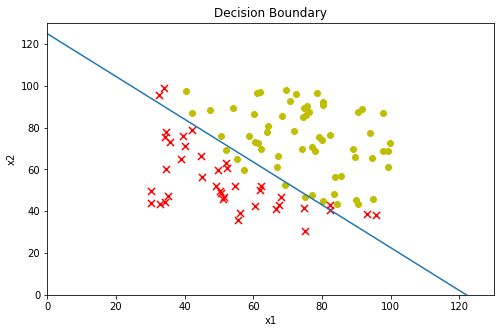

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['exam1'], positive['exam2'], c='y', label='Admitted')
ax.scatter(negetive['exam1'], negetive['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x1, x2)
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary')
plt.show()

# 正则化逻辑会回归
简而言之，正则化是成本函数中的一个术语，它使算法更倾向于“更简单”的模型（在这种情况下，模型将更小的系数）。这个理论助于减少过拟合，提高模型的泛化能力。

设想你是工厂的生产主管，你有一些芯片在两次测试中的测试结果。对于这两次测试，你想决定是否芯片要被接受或抛弃。为了帮助你做出艰难的决定，你拥有过去芯片的测试数据集，从其中你可以构建一个逻辑回归模型。

## 数据可视化

In [36]:
path =  'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


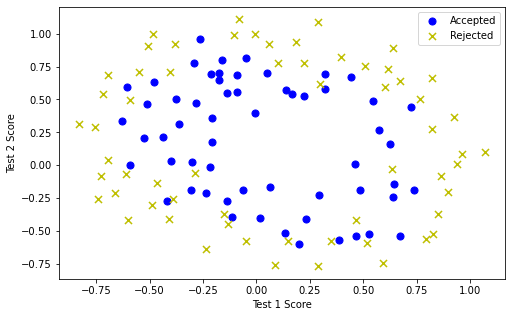

In [49]:
def plot_data():
    positive = data2[data2['Accepted'].isin([1])]
    negative = data2[data2['Accepted'].isin([0])]

    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
    ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='y', marker='x', label='Rejected')
    ax.legend()
    ax.set_xlabel('Test 1 Score')
    ax.set_ylabel('Test 2 Score')
    
plot_data()	

注意到其中的正负两类数据并没有线性的决策界限。因此直接用logistic回归在这个数据集上并不能表现良好，因为它只能用来寻找一个线性的决策边界。

## 特征映射
多项式的特征映射：如果样本量多，逻辑回归问题很复杂，而原始特征只有x1,x2可以用多项式创建更多的特征x1、x2、x1x2、x1^2、x2^2、... X1^nX2^n。因为更多的特征进行逻辑回归时，得到的分割线可以是任意高阶函数的形状。

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
$ mapFeature=
{\begin{bmatrix}
1\\
x_1\\
x_2\\
x_1^2\\
x_1x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1x_2^5\\
x_2^6
\end{bmatrix}}$

In [53]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power + 1):
        for p in np.arange(i + 1):
            data["f{}{}".format(i - p, p)] = np.power(x1, i - p) * np.power(x2, p)

    return pd.DataFrame(data)

In [54]:
x1 = data2['Test 1'].values
x2 = data2['Test 2'].values

In [55]:
_data2 = feature_mapping(x1, x2, power=6)
_data2.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


经过映射，我们将有两个特征的向量转化成了一个28维的向量。

在这个高维特征向量上训练的logistic回归分类器将会有一个更复杂的决策边界，当我们在二维图中绘制时，会出现非线性。

虽然特征映射允许我们构建一个更有表现力的分类器，但它也更容易过拟合。在接下来的练习中，我们将实现正则化的logistic回归来拟合数据，并且可以看到正则化如何帮助解决过拟合的问题

## 正则化逻辑回归代价函数
$$ J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

注意：不惩罚第一项${\theta}_0$

先获取特征，标签以及参数theta，确保维度良好。


In [56]:
# 这里因为做特征映射的时候已经添加了偏置项，所以不用手动添加了。
X = _data2.values  
y = data2['Accepted'].values
theta = np.zeros(X.shape[1])
X.shape, y.shape, theta.shape  # ((118, 28), (118,), (28,))


((118, 28), (118,), (28,))

## 正则化梯度下降
因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$

In [57]:
def gradientReg(theta, X, y, l=1):
    reg = (1 / len(X)) * theta
    reg[0] = 0  
    return gradient(theta, X, y) + reg

gradientReg(theta, X, y, 1)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

## 学习参数

In [58]:
result2 = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, 2))
result2


(array([ 1.02252845,  0.56283947,  1.13465378, -1.78530023, -0.66539149,
        -1.01863396,  0.13957   , -0.29358944, -0.30102267, -0.08324513,
        -1.27206004, -0.06137383, -0.53996526, -0.17881809, -0.9419886 ,
        -0.14054855, -0.17736663, -0.0769737 , -0.22918951, -0.21349652,
        -0.37205413, -0.86417673,  0.00890083, -0.26795962, -0.00362248,
        -0.28315235, -0.07321588, -0.75992674]),
 57,
 4)

## 验证正则化逻辑回归

In [59]:
final_theta = result2[0]
predictions = predict(final_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
accuracy


0.8050847457627118

或者用skearn中的方法来评估结果。

In [60]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        60
           1       0.77      0.86      0.81        58

    accuracy                           0.81       118
   macro avg       0.81      0.81      0.80       118
weighted avg       0.81      0.81      0.80       118



## 决策边界

(-0.8, 1.2)

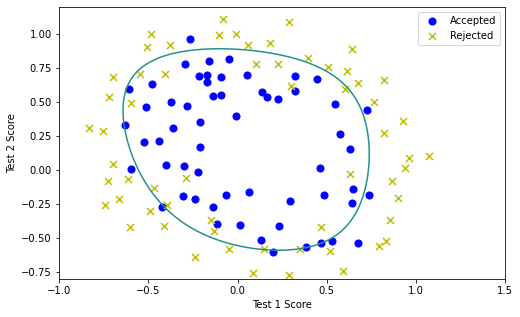

In [62]:
x = np.linspace(-1, 1.5, 250)
xx, yy = np.meshgrid(x, x)

z = feature_mapping(xx.ravel(), yy.ravel(), 6).values
z = z @ final_theta
z = z.reshape(xx.shape)

plot_data()
plt.contour(xx, yy, z, 0)
plt.ylim(-.8, 1.2)
